In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def create_great_school_dataframe():
    school_profile = pd.read_csv(r'C:\Users\huyt\Desktop\Bootcamp\Projects\UCB_project_3\school_profile.csv')
    school_census = pd.read_csv(r'C:\Users\huyt\Desktop\Bootcamp\Projects\UCB_project_3\school_census.csv')

    dataset = school_profile.merge(school_census, on="gsID")
    dataset = dataset.dropna()
    return dataset

dataset = create_great_school_dataframe()
dataset = dataset.dropna()
print('dataset size={}'.format(dataset.size))


dataset.columns

dataset size=352470


Index(['gsID', 'name', 'type', 'gradeRange', 'enrollment', 'parentRating',
       'gsRating', 'district', 'districtId', 'districtNCESId', 'ncesId',
       'address', 'city', 'state', 'lat', 'lon', 'phone', 'Asian',
       'Black, non-Hispanic', 'Hispanic', 'Multiracial',
       'Native American or Native Alaskan',
       'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic',
       'actSatNumberParticipation', 'apCourseParticipation', 'apCoursePassed',
       'freeAndReducedPriceLunch', 'idea', 'percentTeachersInFirstSecondYear',
       'plan504'],
      dtype='object')

In [84]:
X = dataset[["parentRating","Asian","enrollment","percentTeachersInFirstSecondYear"]]
y= dataset["gsRating"].values.reshape(-1,1)
print(X.shape,y.shape)


(11370, 4) (11370, 1)


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [86]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [87]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.13095571464936973
Testing Score: 0.10162860719265421


Text(0.5, 1.0, 'Residual Plot')

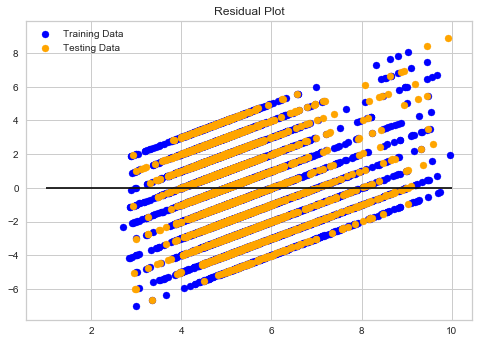

In [88]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

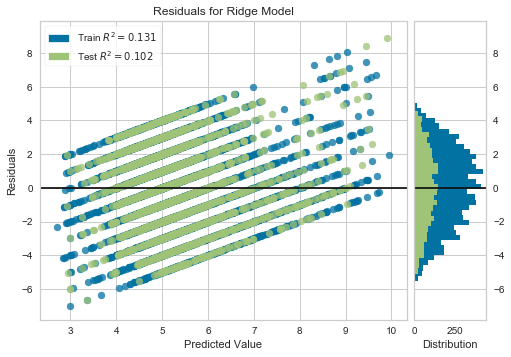

<Figure size 576x396 with 0 Axes>

In [89]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data
visualizer.poof(outpath="pcoords.png")

In [97]:
parentRating_user = input("What is the estimated parent rating? [Enter 1-5] ")

What is the estimated parent rating? [Enter 1-5] 5


In [66]:
enrollment_user = input("How many students are enrolled at this school? ")

How many students are enrolled at this school? 300


In [67]:
asian_user = input ('What is the % of Asian students?[Enter 0-100(%)]')

What is the % of Asian students?[Enter 0-100(%)]15


In [76]:
rookie_user = input ('What is the % of teacheres in their first or second year?[Enter 0-100(%)]')

What is the % of teacheres in their first or second year?[Enter 0-100(%)]10


In [77]:
user_data = pd.DataFrame({"parentRating":[parentRating_user],
                  "Asian Population (%)": [asian_user],
                "Enrollment (# of students)": [enrollment_user],
                         "Rookie Population (%)": [rookie_user]})
user_data

,parentRating,Asian Population (%),Enrollment (# of students),Rookie Population (%)
0,5,15,300,10


In [94]:
value = model.predict(user_data)[0]
s = pd.Series(value)
import math
print("GS Rating is: " + str((s[0])))

GS Rating is: 5.810597868437801


In [95]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 5.293140902207403, R2: 0.10162860719265421


In [99]:
model.coef_

array([[ 0.50428568,  0.04440304,  0.00056589, -0.00287547]])

In [82]:
model.intercept_

array([2.45499487])